# Project PCD 2025 Kelompok 18
## Klasifikasi Kangker Kulit Jinak Dan Ganas
Zainul Majdi (F1D02310028)

Mustofa Arif (F1D02310083)

Apriesna Zulhan (F1D02310100)

Lalu Maulana Rizki Hidayat (F1D02310118)

# Project Overview


# Import Library

In [239]:
import os
import matplotlib.pylab as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from PIL import Image
import pandas as pd
import seaborn as sns

Mengimport Library yang digunakan seperti OS yang digunakan untuk membaca file, plt yang digunakan untuk menghitung, Numpy atau numeric python yang digunakan untuk proses yang berkaitan dengan menghitung, cv2 digunakan untuk mengubah menjadi grayscale, train test split digunakan untuk membagi dataset training dan dataset test, mengimport model KNN, SVC Random Forest, Mengimport akurasi, presisi, recall score dan f1, kemudian mengimport cross val predict gunanya untuk cross validation yang hasil akurasinya lebih bagus karena lebih stabil, PIL import image untuk membaca gambar, pandas untuk membuat dataframe, seaborn digunakan untuk hitmeap atau matriks korelasi untuk mengetahui korelasi antara variabel satu dengan variabel yang lain.  

# Fungsi Resize

In [240]:
def resize(image_path, size):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(size)
        return np.array(img)
    except Exception as err:
        print("Image ga bisa dibaca! %s" % err)
        return None

Fungsi resize di sini digunakan untuk mengubah ukuran gambar. Fungsi ini akan membaca parameter image path dan size. Gambar yang ada di image path akan dibaca sebagai gambar dengan format RGB, kemudian diubah ukurannya sesuai dengan ukuran yang telah ditentukan, misalnya 150x150 piksel. Ukuran 150x150 dipilih karena jika ukurannya 300x300, prosesnya akan memakan waktu yang lebih lama. Kode tersebut juga ada try excep exception, digunakan untuk menangani gambar yang tidak bisa dibaca karena perbedaan format ekstensi.

# Fungsi Loading dataset

In [241]:
def load_dataset(dir):
    size = (150,150)
    images = []
    labels = []
    class_names = os.listdir(dir)
    class_count = {class_name: 0 for class_name in class_names}

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(dir, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                if class_count[class_name] >= 100:
                    break
                img_path = os.path.join(class_dir, file_name)
                img = resize(img_path, size)
                if img is not None:
                    images.append(img)
                    labels.append(class_name)
                    class_count[class_name]+=1
    return np.array(images), np.array(labels), class_names, class_count

Fungsi ini bertujuan untuk memuat dataset gambar dengan pengaturan ukuran 150 piksel. Gambar-gambar dimuat untuk disimpan sebagai data gambar dan labelnya. Misalnya, jika dataset berisi gambar-gambar kangker kulit ganas, maka labelnya akan merepresentasikan jenis kangker kulit ganas tersebut. Proses dimulai dengan pembacaan dan penulisan nama-nama kelas yang terdapat dalam direktori yang disediakan. Direktori tersebut mengacu pada berbagai jenis, seperti "Ganas", "Jinak". Kemudian, variabel class count digunakan untuk melacak jumlah gambar yang ada di setiap kelas dimulai dari nol. Pendekatan ini menggunakan struktur kamus untuk menyimpan informasi, dengan setiap kelas yang diwakili sebagai kunci, dan nilai awal yang diberikan adalah nol. Setelah itu, kita menggunakan fungsi resize untuk membaca dan mengubah ukuran gambar. Jika gambar tersedia, kita tambahkan ke dalam daftar images dan tambahkan labelnya ke dalam labels dengan nama kelas "col". Setiap kali gambar dari kelas ini ditambahkan, kita tambahkan satu ke class_count untuk memperbarui jumlah data yang dimiliki oleh kelas ini. Proses ini berlanjut hingga kita mencapai 100 gambar per kelas, yang setara dengan total 600 gambar yang akan dibaca. Hasil akhir dari fungsi ini adalah array image, labels, dan informasi tentang jumlah data dalam setiap kelas yang direpresentasikan oleh class_count. Alasan penggunaan array NumPy adalah untuk memastikan konsistensi dalam representasi data, mengingat perbedaan format antara list standar Python dan array NumPy yang lebih efisien untuk pengolahan data numerik.

Kode di bawah ini, dari fungsi load_dataset, kita mendapatkan gambar, label, nama kelas, dan jumlah kelas. Kemudian, kita memeriksa berapa banyak gambar yang berhasil dimuat. Jadi, kita berhasil memuat 600 gambar dari 6 kelas. Setelah itu, kita mencetak setiap nama kelas dan jumlah gambar menggunakan class_count.items(). Ini karena class_count adalah sebuah dictionary maka menggunakan item. Masing-masing kelas memiliki 100 gambar, totalnya 100 gambar untuk setiap dari 6 kelas. Selanjutnya, kita dapat membuat diagram batang untuk ini.

In [242]:
dataset_dir = "dataset"

images, labels, class_names, class_count = load_dataset(dataset_dir)

print("Berhasil baca %i citra dari %i kelas." % ((len(images), len(class_names))))
for class_name, count in class_count.items():
    print("Kelas %s punya %i citra." % ((class_name, count)))

Berhasil baca 200 citra dari 2 kelas.
Kelas benign punya 100 citra.
Kelas malignant punya 100 citra.


# Membuat Diagram Batang

jadi, kode di bawah digunakan untuk membuat diagram batang yang menampilkan jumlah citra untuk setiap kelas dalam dataset. Dengan label = list(class_count.keys()) dan jumlah = list(class_count.values()), kita menyiapkan data yang diperlukan untuk sumbu x dan y. plt.bar(label, jumlah) kemudian menggambarkan diagram batang, dengan label sebagai nama kelas dan jumlah sebagai jumlah citra.

Text(0, 0.5, 'Jumlah Citra')

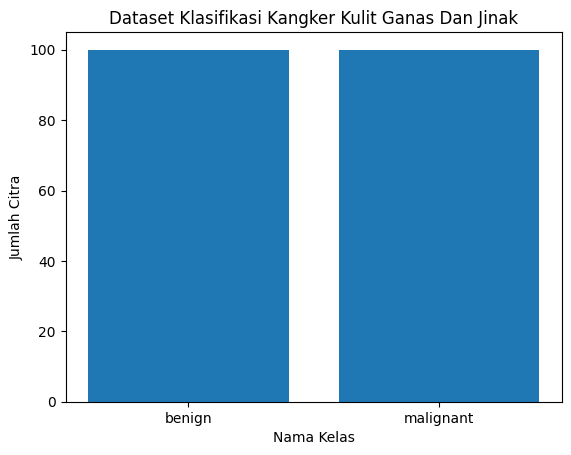

In [243]:
label = list(class_count.keys())
jumlah = list(class_count.values())

plt.bar(label, jumlah)
plt.title("Dataset Klasifikasi Kangker Kulit Ganas Dan Jinak")
plt.xlabel("Nama Kelas")
plt.ylabel("Jumlah Citra")

# Menampilkan Gambar 

Kemudian, kode di bawah ini untuk menampilkan gambar ke-50 dari dataset menggunakan dan mencetak label yang sesuai dengan gambar tersebut.

benign


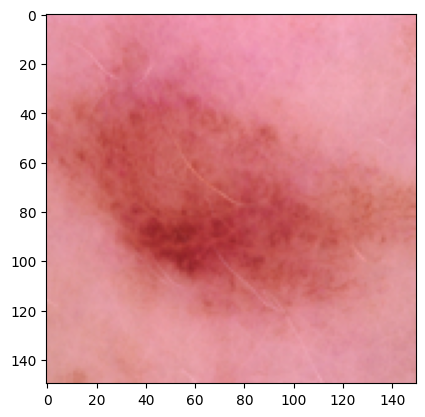

In [244]:
plt.imshow(images[50])
print(labels[50])

# Fungsi Grayscale

In [245]:
images_gray  = []
for image in images:
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images_gray.append(image_gray)


Kita membuat list baru bernama images_gray. Untuk setiap image yang ada di images, kita ubah menjadi grayscale dan simpan di images_gray dengan cara menambahkan (append) setiap gambar grayscale ke dalam list tersebut.

# Menampilkan Hasil Grayscale

Kita coba melihat hasil grayscale pada gambar ke 50

benign


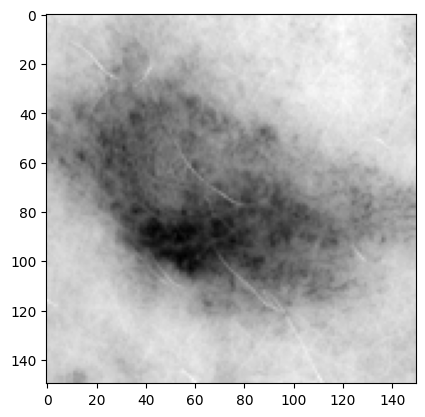

In [246]:
plt.imshow(images_gray[50], cmap='gray')
print(labels[50])

In [247]:
images = np.copy(images_gray)

Disini kita menyalin daftar images ke dalam images_gray. Alasan menyalin ini agar kita bisa tetap menggunakan variabel images yang sama untuk menyimpan gambar-gambar grayscale, sehingga tidak perlu mengganti nama variabel.

# Menampilkan Gambar

malignant


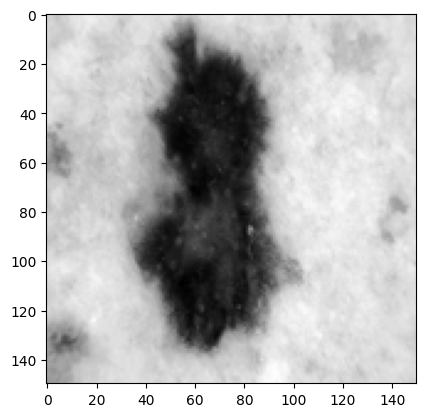

In [248]:
plt.imshow(images[150], cmap='gray')
print(labels[150])

In [249]:
hasil_bright = []
for image in images:
    hasil = image + 50
    hasil_bright.append(hasil)

Di sini ada peningkatan kecerahan atau brightness, di mana kita menambahkan nilai 50 ke setiap gambar dalam images. Penambahan ini dilakukan karena beberapa gambar terlihat agak gelap, sehingga nilai kecerahan atau brightness ditambahkan sebesar 50.

In [250]:
images = np.copy(hasil_bright)

Di sini juga, hasil dari proses brightness disalinke dalam variabel images, untuk memudahkan pengelolaan dan penggunaan data gambar selanjutnya. Dengan cara ini, semua hasil pengolahan tersebut tersedia dalam satu variabel images.

# Mencetak Hasil Image

Kode dibawah untuk menampilkan hasil dari variabel images yang sudah dimodifikasi 

malignant


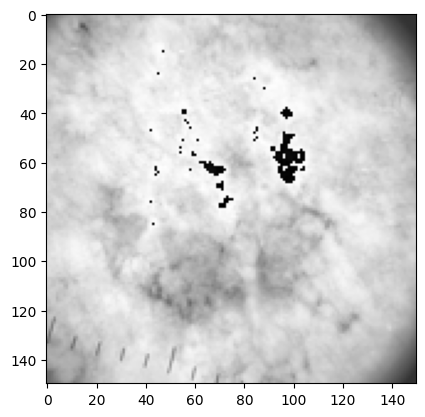

In [251]:
plt.imshow(images[100], cmap='gray')
print(labels[100])

# Untuk Clipping

In [252]:
for image in images:
    image[image>=255] = 255
    image[image<0] =0

Setelah menambahkan 50 ke setiap nilai piksel dalam gambar, kita periksa dan lakukan clipping. Ini karena kemungkinan ada nilai piksel yang melebihi 255 setelah penambahan tersebut. Jika nilai piksel lebih dari 255, kita atur menjadi 255, dan jika kurang dari 0, kita atur menjadi 0. Langkah ini memastikan semua nilai piksel tetap dalam rentang yang valid antara 0 dan 255.

In [253]:
def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

def clip_histogram(histogram, clip_limit):
    excess_pixels = np.sum(histogram - clip_limit * np.ones(histogram.shape, dtype=int))
    histogram = np.clip(histogram, 0, clip_limit)
    bins = histogram.size
    redistribute_value = excess_pixels // bins
    histogram += redistribute_value
    return histogram.astype(int)

def equalize_tile(tile, clip_limit):
    histogram = calculate_histogram(tile)
    histogram = clip_histogram(histogram, clip_limit)
    
    cdf = histogram.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    
    equalized_tile = cdf_normalized[tile]
    return equalized_tile

def clahe(image, tile_size, clip_limit):
    height, width = image.shape
    new_image = np.zeros_like(image)
    
    for y in range(0, height, tile_size):
        for x in range(0, width, tile_size):
            tile = image[y:y+tile_size, x:x+tile_size]
            equalized_tile = equalize_tile(tile, clip_limit)
            new_image[y:y+tile_size, x:x+tile_size] = equalized_tile
            
    return new_image

CLAHE (Contrast Limited Adaptive Histogram Equalization) adalah teknik untuk meningkatkan kontras gambar secara adaptif.  Equalisasi adaptif adalah metode yang digunakan untuk menormalkan citra berdasarkan distribusi intensitasnya di setiap bagian citra, bukan secara global. Pertama, histogram dari setiap citra dihitung untuk memahami sebaran intensitasnya. Kemudian, nilai-nilai histogram dipangkas (clipped) jika melebihi batas yang ditentukan, dengan sisa nilai yang terpotong didistribusikan kembali ke nilai lainnya. Misalnya, jika citra memiliki nilai maksimum 240 dan dipangkas menjadi 220, maka 20 nilai yang terpotong akan didistribusikan kembali ke nilai lainnya. Tujuan dari proses ini adalah untuk memastikan bahwa intensitas citra dalam setiap bagian atau kotak (tile) diequalisasikan secara optimal. Jumlah kotak yang digunakan dalam proses ini ditentukan sebelumnya, demikian pula batas kliping yang diterapkan pada histogram.

In [254]:
hasil_clahe = []
for image in images:
    hasil = clahe(image, 8, 40)
    hasil_clahe.append(hasil)

Dalam kode di atas, kita melakukan proses clahe pada setiap gambar dalam images. Dengan menggunakan fungsi clahe(image, 8, 40) untuk menerapkan CLAHE dengan membagi gambar menjadi 8 kotak (tile) dan menetapkan batas kliping sebesar 40. Hasil dari proses ini disimpan dalam list hasil_clahe.

In [255]:
images = np.copy(hasil_clahe)

Kemudian kode ini berarti images sekarang akan berisi hasil dari proses clahe yang telah kita lakukan sebelumnya pada setiap gambar dalam hasil_clahe, dan ini dapat digunakan untuk proses berikutnya dalam analisis atau pengolahan gambar selanjutnya

# Menampilkan hasil gambar

Hasil dari penggunaan metode clahe sebelumnya menunjukkan perbaikan yang signifikan dalam distribusi intensitas piksel gambar.

malignant


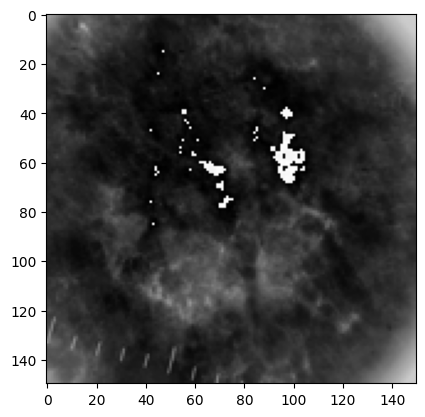

In [256]:
plt.imshow(images[100], cmap='gray')
print(labels[100])

# Algoritma otsu untuk penghilangan background

In [257]:
def otsu(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    pixel_counts = np.sum(hist)
    prob = hist / pixel_counts

    curr_max =0
    batas = 0
    sum_total=0
    sumB=0
    weightB = 0
    weightF = 0

    for i in range(256):
        sum_total += i * prob[i]

    for i in range(256):
        weightB += prob[i]
        if weightB == 0:
            continue
        weightF = 1 - weightB
        if weightF == 0:
            break

        sumB += i * prob[i]
        meanB = sumB / weightB
        meanF = (sum_total - sumB) / weightF

        variasi_antar_kelas = weightB * weightF * (meanB - meanF) ** 2

        if variasi_antar_kelas > curr_max:
            curr_max = variasi_antar_kelas
            batas = i

    hasil = image.copy()
    hasil[image > batas] = 255
    hasil[image <= batas] = 0

    return hasil

hasil_otsu = []
for image in images:
    hasil = otsu(image)
    hasil_otsu.append(hasil)

Algoritma Otsu digunakan di sini untuk melakukan segmentasi gambar dengan tujuan menghilangkan background. Langkah-langkah algoritma dimulai dengan perhitungan histogram untuk mendapatkan distribusi intensitas piksel dalam gambar. Histogram tersebut kemudian digunakan untuk menghitung probabilitas masing-masing intensitas piksel. Selanjutnya, algoritma mencari ambang nilai optimal (threshold) yang memaksimalkan variasi antar kelas, di mana piksel dengan intensitas di atas ambang dianggap sebagai objek (foreground) dan yang di bawah ambang sebagai background. Dalam konteks penghilangan background, hasil dari algoritma Otsu digunakan untuk membuat penghalang atau masking yang menyorot objek dalam gambar dengan mengabaikan bagian latar belakang. Proses ini mirip dengan deteksi objek tetapi fokusnya lebih pada segmentasi atau pemisahan objek dari latar belakang secara keseluruhan. Penghalang yang dihasilkan berperan penting dalam analisis gambar berbasis objek, di mana objek tersebut dapat diisolasi untuk dilakukan analisis lanjutan seperti pengenalan objek atau pengukuran fitur.

In [258]:
def gabungkan(image, mask):
    height, width  = image.shape

    new_img = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            if(mask[i][j]==0):
                new_img[i][j] = image[i][j]
    return new_img

hasil_remove_bg = []
for i in range(len(images)):
    hasil = gabungkan(images[i], hasil_otsu[i])
    hasil_remove_bg.append(hasil)

Di sini, kita menggabungkan citra dengan mask. Proses ini melibatkan pembuatan citra baru yang awalnya kosong, dengan ukuran yang sama dengan citra asli (height dan width). Jika nilai pada mask adalah nol, maka citra baru akan diisi dengan nilai piksel dari citra asli pada posisi yang sama. mask digunakan untuk menentukan bentuk atau area objek yang akan dipertahankan, sedangkan area dengan nilai nol pada mask akan dianggap sebagai latar belakang atau yang tidak relevan. Setelah itu, kita menyalin nilai piksel dari citra asli (image) ke citra baru (new image) hanya di area yang sesuai dengan mask, dan hasilnya akan dikembalikan sebagai citra baru tanpa latar belakang.

In [259]:
images = np.copy(hasil_remove_bg).astype(int)

Selanjutnya kode di atas digunakan untuk membuat salinan dari hasil_remove_bg dan mengubah tipe data salinan tersebut menjadi integer. Hal ini dilakukan karena hasil_remove_bg  memiliki tipe data float setelah proses sebelumnya. Dengan mengubahnya menjadi tipe data integer (int), kita memastikan bahwa nilai-nilai dalam images hanya berupa bilangan bulat.

# Mencetak Hasil Hapus Background

Setelah proses hapus background, gambar yang sebelumnya masih meiliki background akan dihapus dan menyisakan gambar utuh tanpa background

malignant


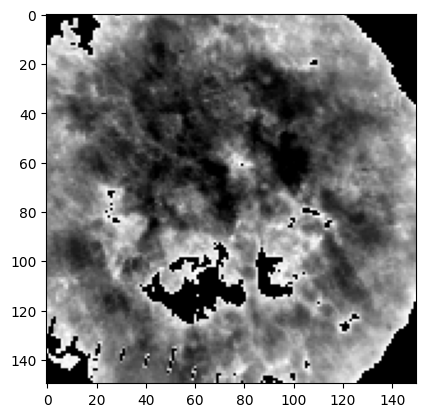

In [260]:
plt.imshow(images[100], cmap='gray')
print(labels[100])

# GLCM

In [261]:
def glcm0(image, jarak):
    max_val = np.max(image)
    tmp = np.zeros([max_val + 1, max_val + 1])

    for i in range(len(image)):
        for j in range(len(image[i]) - jarak):
            tmp[image[i,j], image[i,j+jarak]] += 1
    
    hasil = tmp + tmp.T
    hasil /= np.sum(hasil)
    return hasil

Baris kode di atas merupakan fungsi glcm0, yaitu  kode implementasi untuk menghitung matriks Co-Occurrence Gray-Level (GLCM) dengan sudut 0 derajat pada sebuah gambar. Pertama, fungsi ini mengidentifikasi nilai maksimum dari piksel dalam gambar untuk menentukan ukuran matriks GLCM yang dibutuhkan. Kemudian, matriks GLCM diinisialisasi dengan nol dan diisi dengan menghitung kemunculan pasangan intensitas piksel yang terpisah sejauh jarak dalam arah horizontal. Setelah itu, matriks GLCM supaya menjadi simetris ditambahan dengan transpose. Kemudian, matriks GLCM dinormalisasi dengan membagi total dari hasil dan setelah itu mendapatkan hasil dari glcm-nya.

In [262]:
def glcm45(image, jarak):
    max_val = np.max(image)
    tmp = np.zeros([max_val + 1, max_val + 1])

    for i in range(len(image)-jarak):
        for j in range(len(image[i]) - jarak):
            tmp[image[i+jarak,j], image[i,j+jarak]] += 1
    
    hasil = tmp + tmp.T
    hasil /= np.sum(hasil)
    return hasil

Baris kode di atas merupakan fungsi glcm45 digunakan untuk menghitung matriks Co-Occurrence Gray-Level (GLCM) dengan sudut 45 derajat pada sebuah gambar. Pertama, nilai maksimum dari intensitas piksel dalam gambar diidentifikasi untuk menentukan ukuran matriks GLCM yang sesuai. Matriks tmp diinisialisasi dengan ukuran yang sesuai, kemudian diisi dengan menghitung kemunculan intensitas piksel yang berjarak jarak dalam arah diagonal dari kiri bawah ke kanan atas dalam gambar. Untuk memastikan simetri dari representasi diagonal matriks GLCM, hasil dari tmp ditambahkan dengan transpose-nya. Selanjutnya, matriks GLCM dinormalisasi dengan membagi total elemen dalam matriks hasil, sehingga menghasilkan distribusi relatif dari kemunculan intensitas piksel dalam gambar. 

In [263]:
def glcm90(image, jarak):
    max_val = np.max(image)
    tmp = np.zeros([max_val + 1, max_val + 1])

    for i in range(len(image)-jarak):
        for j in range(len(image[i])):
            tmp[image[i+jarak,j], image[i,j]] += 1
    
    hasil = tmp + tmp.T
    hasil /= np.sum(hasil)
    return hasil

Fungsi glcm90 di atas adalah implementasi untuk menghitung matriks Co-Occurrence Gray-Level (GLCM) dengan sudut 90 derajat pada sebuah gambar. Pertama, nilai maksimum dari intensitas piksel dalam gambar diidentifikasi untuk menentukan ukuran matriks GLCM yang tepat. Matriks tmp diinisialisasi dengan ukuran yang sesuai dan diisi dengan menghitung kemunculan intensitas piksel yang terpisah sejauh jarak dalam arah vertikal dari bawah ke atas gambar. Untuk memastikan simetri dari representasi matriks GLCM, hasil dari tmp ditambahkan dengan transpose-nya. Selanjutnya, matriks GLCM dinormalisasi dengan membagi total elemen dalam matriks hasil, sehingga menghasilkan distribusi relatif dari kemunculan intensitas piksel dalam gambar. 

In [264]:
def glcm135(image, jarak):
    max_val = np.max(image)
    tmp = np.zeros([max_val + 1, max_val + 1])

    for i in range(len(image)-jarak):
        for j in range(len(image[i]) - jarak):
            tmp[image[i,j], image[i+jarak,j+jarak]] += 1
    
    hasil = tmp + tmp.T
    hasil /= np.sum(hasil)
    return hasil

Baris kode di atas adalah implementasi fungsi glcm135 yang digunakan untuk menghitung matriks Co-Occurrence Gray-Level (GLCM) dengan sudut 135 derajat pada sebuah gambar. Pertama, fungsi ini menghitung nilai maksimum dari intensitas piksel dalam gambar untuk menyesuaikan ukuran matriks GLCM yang diperlukan. Matriks tmp diinisialisasi dengan ukuran yang sesuai dan diisi dengan menghitung kemunculan intensitas piksel yang berjarak jarak dalam arah diagonal dari kiri atas ke kanan bawah dalam gambar. Untuk memastikan simetri dari representasi diagonal matriks GLCM, hasil dari tmp ditambahkan dengan transpose-nya. Selanjutnya, matriks GLCM dinormalisasi dengan membagi total elemen dalam matriks hasil, sehingga menghasilkan distribusi relatif dari kemunculan intensitas piksel dalam gambar.

In [265]:
hasil_glcm0 = []
hasil_glcm45 = []
hasil_glcm90 = []
hasil_glcm135 = []

for image in images:
    glcm_0 = glcm0(image, 1)
    glcm_45 = glcm45(image, 1)
    glcm_90 = glcm90(image, 1)
    glcm_135 = glcm135(image, 1)
    hasil_glcm0.append(glcm_0)
    hasil_glcm45.append(glcm_45)
    hasil_glcm90.append(glcm_90)
    hasil_glcm135.append(glcm_135)

Baris kode di atas melakukan iterasi melalui setiap gambar dalam images dengan menggunakan parameter jarak satu, sesuai dengan ukuran gambar yang berukuran 150x150 piksel. Matriks GLCM yang dihasilkan dari empat sudut (0, 45, 90, dan 135 derajat) disimpan masing-masing dalam variabel hasil_glcm0, hasil_glcm45, hasil_glcm90, dan hasil_glcm135.

In [266]:
def hitung_homogenity(glcm):
    height, width = glcm.shape
    homogenity = 0
    for i in range(height):
        for j in range(width):
            homogenity += glcm[i,j] / (1+abs(i-j))
    return homogenity

Baris kode d atas merupakan fungsi untuk mgnhitung homogenity atau tingkat keseragaman distribusi intensitas piksel dalam matriks GLCM. Untuk setiap elemen dalam GLCM, nilai homogenitas ditambahkan dengan membagi nilai GLCM pada posisi (i, j) dengan 1 + abs(i - j), bahwa semakin kecil perbedaan antara indeks i dan j, semakin tinggi kontribusi terhadap homogenitas, yang mencerminkan sejauh mana intensitas piksel dalam gambar lebih seragam.

In [267]:
def hitung_contrast(glcm):
    height, width = glcm.shape
    contrast = 0
    for i in range(height):
        for j in range(width):
            contrast += (i-j) ** 2 * glcm[i, j]
    return contrast

Baris kode di ats merupakan fungsi untuk menghitung kontras dari matriks GLCM. Kontras diukur dengan cara mengevaluasi perbedaan kuadrat antara indeks baris (i) dan kolom (j) dari setiap elemen dalam GLCM, dikalikan dengan nilai GLCM pada posisi tersebut. Semakin besar perbedaan antara i dan j, semakin tinggi kontribusi terhadap nilai kontras. Hasilnya adalah sebuah nilai yang mencerminkan seberapa jauh intensitas piksel berbeda satu sama lain dalam gambar, dengan nilai kontras yang lebih tinggi menunjukkan perbedaan intensitas yang lebih besar.

In [268]:
def hitung_dissimilarity(glcm):
    dissimilarity = 0
    height, width = glcm.shape
    for i in range(height):
        for j in range(width):
            dissimilarity += abs(i-j) * glcm[i, j]
    return dissimilarity

Baris kode di atas merupakan fungsi untuk menghitung dissimilarity dari matriks GLCM. Dissimilarity diukur dengan cara menjumlahkan nilai absolut dari perbedaan antara indeks baris (i) dan kolom (j) dari setiap elemen dalam GLCM, dikalikan dengan nilai GLCM pada posisi tersebut. Semakin besar perbedaan antara i dan j, semakin tinggi kontribusi terhadap nilai dissimilarity. Hasilnya adalah sebuah nilai yang mencerminkan seberapa jauh intensitas piksel berbeda satu sama lain dalam gambar, dengan nilai dissimilarity yang lebih tinggi menunjukkan perbedaan intensitas yang lebih besar.

In [269]:
def hitung_energy(glcm):
    asm = np.sum(glcm**2)
    energy = np.sqrt(asm)
    return energy

Baris kode di atas merupakan fungsi untuk menghitung energi dari matriks GLCM. Energi menggambarkan seberapa seragam distribusi intensitas piksel dalam gambar. Dalam fungsi ini, energi dihitung dengan mengkuadratkan setiap elemen GLCM, menjumlahkannya (ASM), dan kemudian mengambil akar kuadrat dari hasilnya. Semakin tinggi nilai energi, semakin seragam distribusi intensitas piksel dalam gambar, menunjukkan pola intensitas piksel yang lebih konsisten dan tersebar secara merata.

In [270]:
def hitung_correlation(glcm):
    height, width = glcm.shape
    mean_i = np.sum([i * np.sum(glcm[i, :]) for i in range(height)])
    mean_j = np.sum([j * np.sum(glcm[:, j]) for j in range(width)])
    std_i = np.sqrt(np.sum([((i - mean_i) ** 2) * np.sum(glcm[i, :]) for i in range(height)]))
    std_j = np.sqrt(np.sum([((j - mean_j) ** 2) * np.sum(glcm[:, j]) for j in range(width)]))

    correlation = 0
    for i in range(height):
        for j in range(width):
            correlation += ((i - mean_i) * (j - mean_j) * glcm[i, j]) / (std_i * std_j + 1e-10)
    return correlation

Baris kode di atas merupakan fungsi menghitung koefisien korelasi dari matriks GLCM. Korelasi mengukur seberapa terkait intensitas piksel dalam gambar secara linier. Dalam fungsi ini, pertama-tama dihitung rata-rata (mean_i dan mean_j) dan standar deviasi (std_i dan std_j) dari distribusi intensitas piksel dalam arah baris dan kolom GLCM. Selanjutnya, koefisien korelasi dihitung dengan memperhitungkan perbedaan antara intensitas piksel dari rata-rata, dan membaginya dengan produk dari standar deviasi baris dan kolom. Semakin tinggi nilai koefisien korelasi, semakin kuat hubungan linier antara intensitas piksel dalam gambar.

In [271]:
def hitung_entropy(glcm):
    entropy = -np.sum(glcm * np.log2(glcm + 1e-10))
    return entropy

Baris kode di atas untuk menghitung entropy dari matriks GLCM. Entropy adalah ukuran kompleksitas atau ketidakpastian informasi dalam gambar. Dalam fungsi ini, entropy dihitung dengan menjumlahkan produk antara setiap elemen GLCM dan logaritma basis 2 dari elemen tersebut, ditambah dengan nilai kecil (1e-10) untuk menghindari nilai logaritma nol. Semakin tinggi nilai entropy, semakin kompleks tekstur atau pola dalam gambar, menunjukkan variasi yang lebih besar dalam intensitas piksel.

In [272]:
def hitung_asm(glcm):
    asm = np.sum(glcm ** 2)
    return asm

Baris kode di atas untuk  menghitung Angular Second Moment (ASM) dari matriks GLCM. ASM mengindikasikan seberapa seragam distribusi intensitas piksel dalam gambar. Dalam fungsi ini, ASM dihitung dengan mengkuadratkan setiap elemen dalam GLCM dan menjumlahkannya. Semakin tinggi nilai ASM, semakin seragam distribusi intensitas piksel dalam gambar, menunjukkan pola intensitas piksel yang lebih stabil dan konsisten.

In [273]:
fitur_homogenity = []
fitur_contrast = []
fitur_dissimilarity = []
fitur_energy = []
fitur_correlation = []
fitur_entropy = []
fitur_asm = []

Baris kode merupakan list digunakan untuk menyimpan nilai-nilai fitur yang mewakili berbagai karakteristik tekstur dalam gambar, seperti seragamnya intensitas, perbedaan intensitas, hubungan linier, kompleksitas informasi.

In [274]:
for indeks in range(len(hasil_glcm0)):
    glcm_0 = hasil_glcm0[indeks]
    glcm_45 = hasil_glcm45[indeks]
    glcm_90 = hasil_glcm90[indeks]
    glcm_135 = hasil_glcm135[indeks]

    homogenity_0 = hitung_homogenity(glcm_0)
    contrast_0 = hitung_contrast(glcm_0)
    dissimilarity_0 = hitung_dissimilarity(glcm_0)
    energy_0 = hitung_energy(glcm_0)
    correlation_0 = hitung_correlation(glcm_0)
    entropy_0 = hitung_entropy(glcm_0)
    asm_0 = hitung_asm(glcm_0)

    homogenity_45 = hitung_homogenity(glcm_45)
    contrast_45 = hitung_contrast(glcm_45)
    dissimilarity_45 = hitung_dissimilarity(glcm_45)
    energy_45 = hitung_energy(glcm_45)
    correlation_45 = hitung_correlation(glcm_45)
    entropy_45 = hitung_entropy(glcm_45)
    asm_45 = hitung_asm(glcm_45)

    homogenity_90 = hitung_homogenity(glcm_90)
    contrast_90 = hitung_contrast(glcm_90)
    dissimilarity_90 = hitung_dissimilarity(glcm_90)
    energy_90 = hitung_energy(glcm_90)
    correlation_90 = hitung_correlation(glcm_90)
    entropy_90 = hitung_entropy(glcm_90)
    asm_90 = hitung_asm(glcm_90)

    homogenity_135 = hitung_homogenity(glcm_135)
    contrast_135 = hitung_contrast(glcm_135)
    dissimilarity_135 = hitung_dissimilarity(glcm_135)
    energy_135 = hitung_energy(glcm_135)
    correlation_135 = hitung_correlation(glcm_135)
    entropy_135 = hitung_entropy(glcm_135)
    asm_135 = hitung_asm(glcm_135)

    fitur_homogenity.append([homogenity_0, homogenity_45, homogenity_90, homogenity_135])
    fitur_contrast.append([contrast_0, contrast_45, contrast_90, contrast_135])
    fitur_dissimilarity.append([dissimilarity_0, dissimilarity_45, dissimilarity_90, dissimilarity_135])
    fitur_energy.append([energy_0, energy_45, energy_90, energy_135])
    fitur_correlation.append([correlation_0, correlation_45, correlation_90, correlation_135])
    fitur_entropy.append([entropy_0, entropy_45, entropy_90, entropy_135])
    fitur_asm.append([asm_0, asm_45, asm_90, asm_135])

Baris kode di atas merupakan proses untuk perhitungan dari berbagai fitur tadi, etiap iterasi indeks dari hasil GLCM 0 akan melibatkan perulangan untuk semua hasil GLCM yang dihitung. Jadi, digunakan loop untuk mengakses setiap hasil GLCM (misalnya hasil_glcm0, hasil_glcm45, hasil_glcm90, hasil_glcm135) berdasarkan indeksnya. Misalnya, glcm_0 akan diisi dengan hasil_glcm0[indeks], dan ini berlaku juga untuk glcm_45, glcm_90, dan glcm_135. Kemudian, memanggil fungsi-fungsi seperti hitung_homogenity, hitung_contrast, dan lainnya untuk menghitung fitur-fitur seperti homogenity, kontras, dissimilarity, energi, korelasi, entropi, dan ASM untuk setiap sudut GLCM (0°, 45°, 90°, 135°). Hasil dari perhitungan ini dimasukkan ke dalam list seperti fitur_homogenity, fitur_contrast, dan seterusnya. Setiap fitur ini merupakan list dalam list yang berisi nilai-nilai fitur untuk semua sudut GLCM dari satu gambar. Proses ini memakan waktu karena perlu dilakukan penghitungan fitur untuk empat sudut GLCM yang berbeda untuk setiap gambar.

In [275]:
features_df = pd.DataFrame({
    'homogeneity_0': [i[0] for i in fitur_homogenity],
    'homogeneity_45': [i[1] for i in fitur_homogenity],
    'homogeneity_90': [i[2] for i in fitur_homogenity],
    'homogeneity_135': [i[3] for i in fitur_homogenity],
    'contrast_0': [i[0] for i in fitur_contrast],
    'contrast_45': [i[1] for i in fitur_contrast],
    'contrast_90': [i[2] for i in fitur_contrast],
    'contrast_135': [i[3] for i in fitur_contrast],
    'dissimilarity_0': [i[0] for i in fitur_dissimilarity],
    'dissimilarity_45': [i[1] for i in fitur_dissimilarity],
    'dissimilarity_90': [i[2] for i in fitur_dissimilarity],
    'dissimilarity_135': [i[3] for i in fitur_dissimilarity],
    'energy_0': [i[0] for i in fitur_energy],
    'energy_45': [i[1] for i in fitur_energy],
    'energy_90': [i[2] for i in fitur_energy],
    'energy_135': [i[3] for i in fitur_energy],
    'correlation_0': [i[0] for i in fitur_correlation],
    'correlation_45': [i[1] for i in fitur_correlation],
    'correlation_90': [i[2] for i in fitur_correlation],
    'correlation_135': [i[3] for i in fitur_correlation],
    'entropy_0': [i[0] for i in fitur_entropy],
    'entropy_45': [i[1] for i in fitur_entropy],
    'entropy_90': [i[2] for i in fitur_entropy],
    'entropy_135': [i[3] for i in fitur_entropy],
    'asm_0': [i[0] for i in fitur_asm],
    'asm_45': [i[1] for i in fitur_asm],
    'asm_90': [i[2] for i in fitur_asm],
    'asm_135': [i[3] for i in fitur_asm]
})

features_df['label'] = labels

features_df.head()

features_df.to_csv('hasil_glcm_rotasi_flip_front_back.csv', index=False)

Baris kode di atas merupakan proses pembuatan features_df, yaitu sebuah DataFrame menggunakan Pandas. DataFrame ini menggambarkan berbagai fitur tekstur seperti homogenity, kontras, dissimilarity, energi, korelasi, entropi, dan ASM dari empat sudut GLCM (0°, 45°, 90°, 135°) untuk setiap gambar dalam dataset. Setiap kolom dalam DataFrame ini diisi dengan nilai-nilai fitur yang diambil dari list fitur_homogenity, fitur_contrast, dan sebagainya, dengan indeks i[0], i[1], i[2], dan i[3] masing-masing mewakili empat sudut GLCM. Kolom label diisi dengan nilai dari variabel labels, yang mewakili label dari setiap gambar. Metode .head() digunakan untuk menampilkan lima baris pertama dari DataFrame, memudahkan untuk melihat contoh data. DataFrame ini kemudian disimpan ke dalam file CSV dengan nama 'hasil_glcm_rotasi_flip_front_back.csv', yang berguna untuk menyimpan data hasil perhitungan fitur agar tidak perlu melakukan penghitungan ulang GLCM, mempercepat proses latihan model berikutnya.

In [276]:
# ini diuncomment kalo butuh cepet ga perlu nungguin ngitung fitur lagi
# features_df = pd.read_csv("hasil_glcm_rotasi_flip_front_back.csv")

In [277]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
features_df['label_new'] = label_encoder.fit_transform(features_df['label'])

Baris kode di atas untuk melakukan encoder, encoder ini untuk mengubah label string menjadi label numerik, karena label string tidak bisa langsung digunakan dalam perhitungan statistik atau pelatihan model. Misalnya, jika terdapat label Coal maka akan diubah menjadi angka seperti 0, 1, dan 2. Setelah itu dibuat kolom baru bernama label_new di DataFrame features_df dan menggunakan label_encoder.fit_transform untuk melakukan konversi. Dengan cara ini, label string diubah menjadi angka yang bisa digunakan dalam perhitungan dan analisis selanjutnya.

In [278]:
features_df = features_df.drop('label', axis=1)

Baris kode di atas untuk menghapus kolom label yang lama dari DataFrame dengan menggunakan features_df.drop(label, axis=1). Jadi, dalam DataFrame features_df, hanya akan ada fitur-fitur tekstur dan kolom label yang baru label_new. 

Baris kode di bawa ini proses pembuatan matriks korelasi dan visualisasinya dengan heatmap. Kita menggunakan features_df.corr() untuk menghitung korelasi antara fitur-fitur dalam DataFrame, lalu menampilkan hasilnya dengan heatmap menggunakan. Korelasi ini menunjukkan hubungan antara satu fitur dengan fitur lainnya. Misalnya, jika nilai korelasi homogenity_0 dengan homogenity_45 adalah 0,99, berarti keduanya sangat berkorelasi positif. Nilai korelasi berkisar dari -1 hingga 1: nilai 1 berarti korelasi positif, -1 berarti korelasi snegatif, dan 0 berarti tidak ada korelasi (netral). Karena jumlah fiturnya banyak, menggunakan heatmap membantu untuk melihat pola korelasi secara visual tanpa harus menghitung satu per satu.

<Axes: >

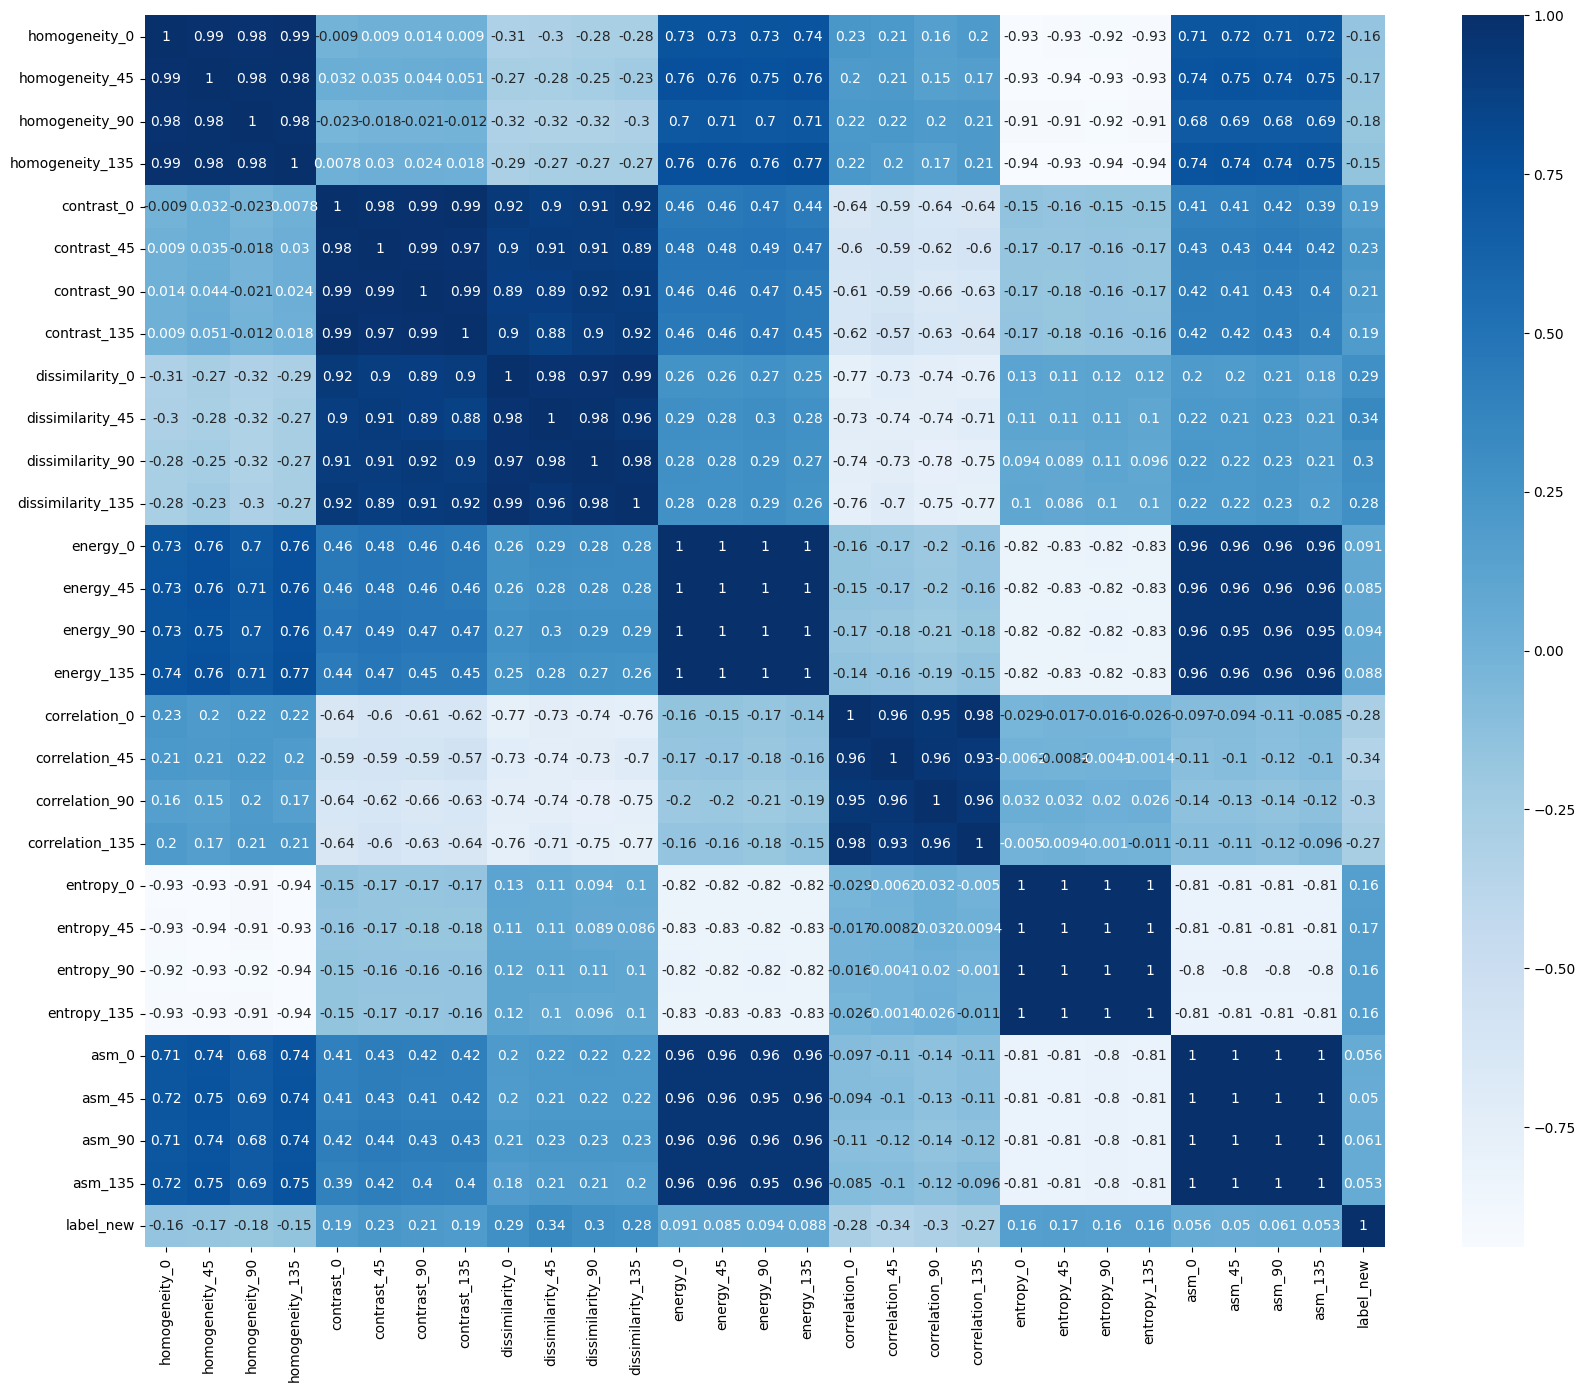

In [279]:
corr_matriks = features_df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matriks, annot=True, cmap=plt.cm.Blues)

In [280]:
print(corr_matriks.shape)

(29, 29)


Baris kode di atas berfungsi untuk menampilkan dimensi dari matriks korelasi corr_matriks sebesar 29,29

In [281]:
print(features_df.shape)

(200, 29)


fungsi shape pada dataframe akan memberikan tuple yang menunjukkan jumlah baris dan kolom dalam dataframe tersebut.

In [282]:
batas = 0.99

columns = np.full((corr_matriks.shape[0],), True, dtype=bool)

for i in range(corr_matriks.shape[0]):
    for j in range(i + 1, corr_matriks.shape[0]):
        if corr_matriks.iloc[i, j] >= batas:
            if columns[j]:
                columns[j] = False

pilih = features_df.columns[columns]
features_df = features_df[pilih]

Baris kode di atas untuk membuang fitur-fitur yang memiliki korelasi di atas batas tertentu untuk menghindari multikolinearitas. Batas korelasi yang digunakan adalah 0,99. Ini berarti fitur-fitur yang memiliki korelasi di atas 0,99 dianggap redundan dan dibuang. Untuk melakukannya, terlebih dahulu membuat array columns dengan nilai True untuk semua fitur. Lalu, memeriksa setiap pasangan fitur dalam matriks korelasi. Jika korelasi antara dua fitur lebih besar atau sama dengan 0,99, kita menandai salah satu dari keduanya sebagai False dalam array columns. Setelah itu, kita memilih hanya kolom-kolom yang masih True di array columns dan memperbarui DataFrame features_df dengan kolom-kolom yang terpilih saja. Proses ini memastikan bahwa DataFrame features_df hanya berisi fitur-fitur yang tidak redundant.

Kode di bawah, Setelah menghapus beberapa fitur dari dataset, jumlah fitur yang awalnya 29 (termasuk label) berkurang menjadi 28. Dari 28 fitur tersebut, setelah proses penghapusan, tersisa hanya 16 fitur yang dapat digunakan. Salah satu fitur yang tetap ada meskipun pengurangan adalah fitur label itu sendiri, karena fitur label memiliki korelasi dengan dirinya sendiri, sehingga tidak mungkin untuk dihapus.Jumlah fitur yang tersisa adalah 16 setelah menghapus yang tidak relevan, dengan satu fitur tambahan yang adalah fitur label yang tetap ada karena korelasi terhadap dirinya sendiri.

<Axes: >

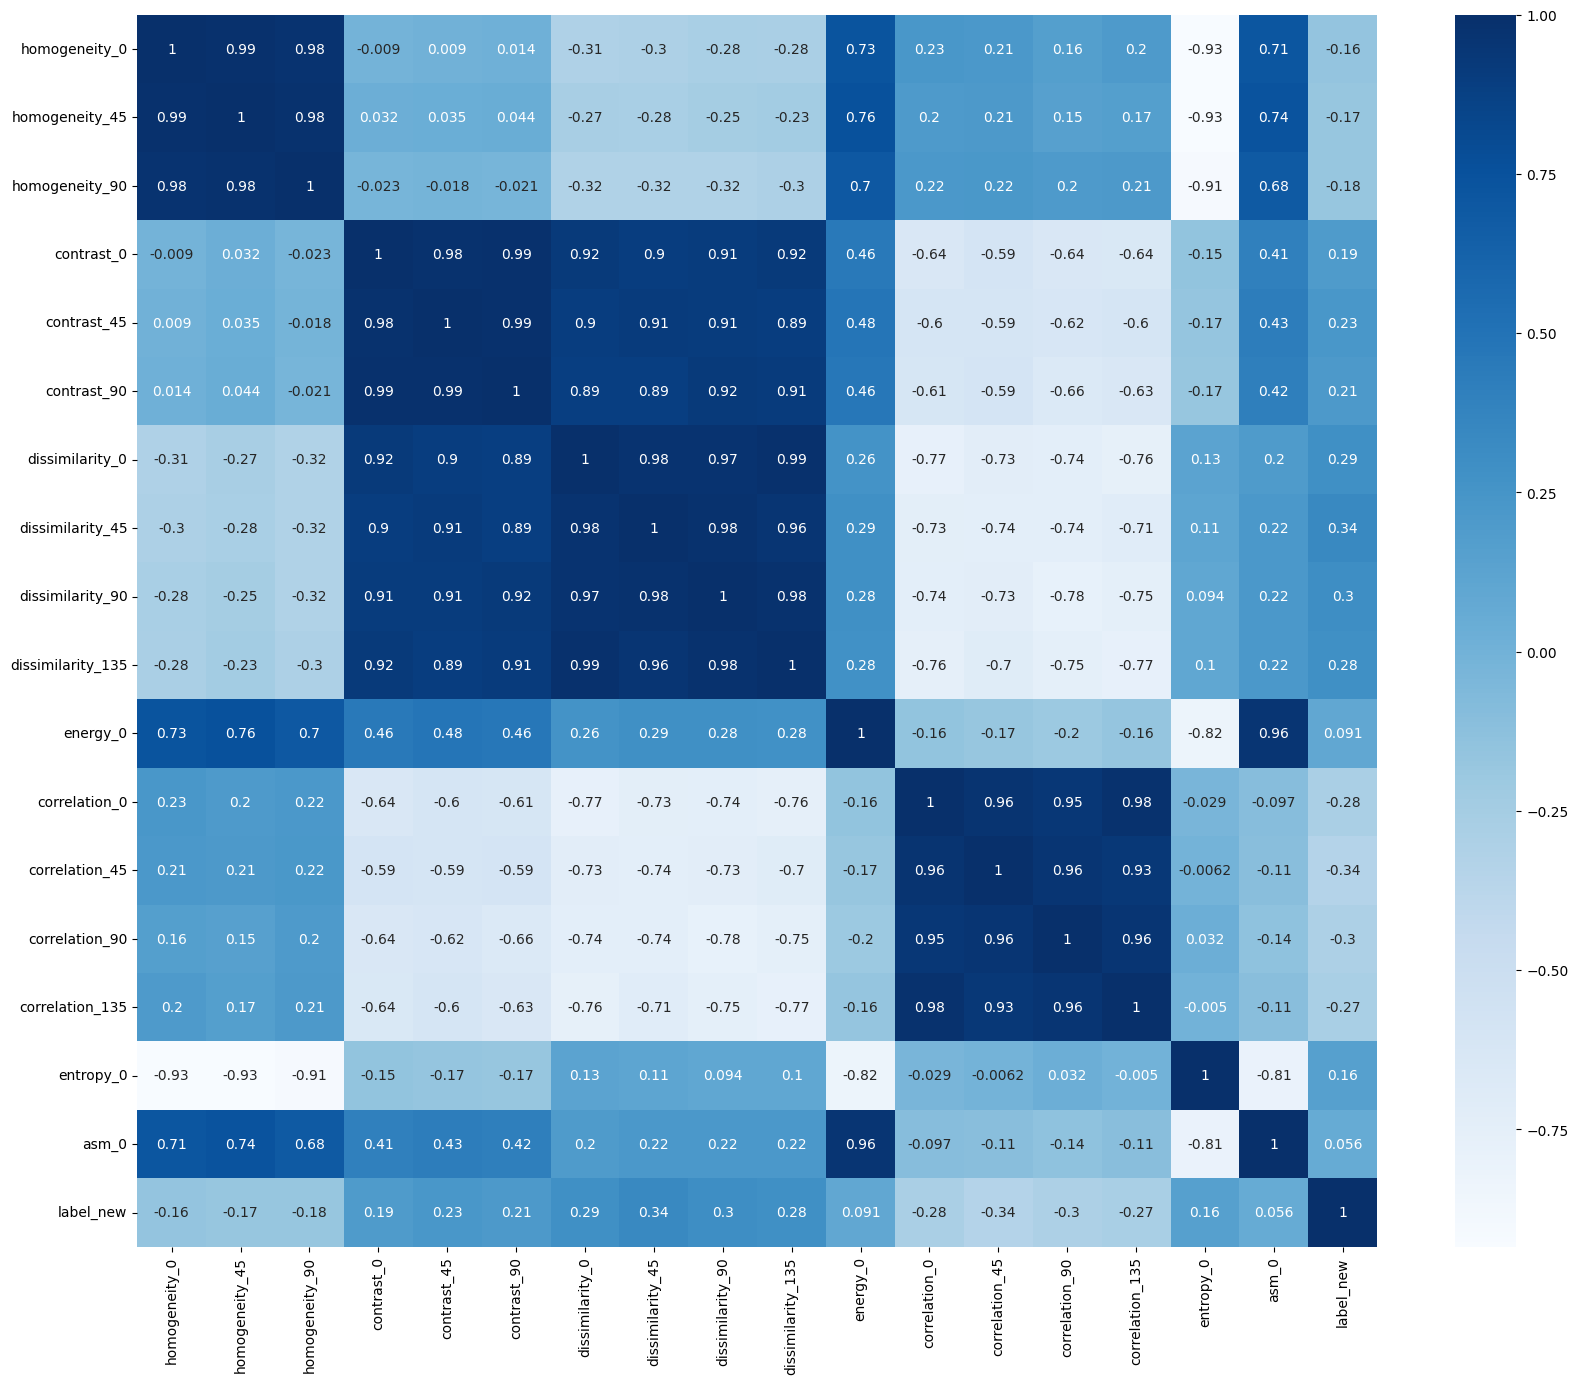

In [283]:
corr_matriks = features_df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_matriks, annot=True, cmap=plt.cm.Blues)

In [284]:
print(corr_matriks.shape)

(18, 18)


Baris kode di atas berfungsi untuk menampilkan dimensi dari matriks korelasi corr_matriks sebesar 17,17

Jadi pada kode di bawah ini ada X, X adalah fitur independen dan y adalah fitur dependen yang ingin diprediksi. Disini kita menggunakan semua fitur kecuali 'label_new' untuk X, sementara y hanya terdiri dari kolom 'label_new'. Fungsi train_test_split digunakan untuk membagi dataset menjadi X_train, X_test, y_train, dan y_test. Tujuannya adalah untuk memisahkan data agar tidak semua digunakan untuk pelatihan saja, tetapi juga untuk evaluasi model. Kami memilih perbandingan 70:30 untuk data pelatihan dan pengujian karena ini adalah praktik yang umum dalam machine learning yang memberikan keseimbangan yang baik antara jumlah data yang digunakan untuk pelatihan dan pengujian. Dalam kasus ini, dengan total data 1752, data pelatihan berjumlah 1226 dan data pengujian berjumlah 526.

In [285]:
x = features_df.drop(columns=['label_new'])
y = features_df['label_new']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

print("x_train ada %i" % len(x_train))
print("y_train ada %i" % len(y_train))
print("x_test ada %i" % len(x_test))
print("y_test ada %i" % len(y_test))

x_train ada 140
y_train ada 140
x_test ada 60
y_test ada 60


In [286]:
def normalisasi(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data_std = (data-mean)/std
    return data_std

Sebelum kita normalisasi, kita menggunakan metode standar dengan mean dan standar deviasi (STD). Pemilihan ini disebabkan karena normalisasi dengan STD umumnya memberikan akurasi yang lebih baik. Prosesnya dimulai dengan menghitung mean dan STD dari setiap fitur, lalu data dibagi dengan nilai STD untuk memusatkan data di sekitar mean nol. 

In [287]:
x_train_normal = normalisasi(x_train)
x_test_normal = normalisasi(x_test)

Normalisasi dilakukan pada fitur-fitur data dan tidak termasuk label, karena label umumnya sudah dalam bentuk kategorikal seperti 0, 1, 2, 3, 4, 5, dan tidak perlu dinormalisasi.

# Menampilkan Hasil setelah normalisasai

Sebelum dilakukan normalisasi data awal ditampilkan dengan nilai-nilai mentah sebelum proses normalisasi dilakukan. Setiap baris mewakili fitur-fitur yang telah diekstraksi dari gambar-gambar yang digunakan dalam analisis. Kemudian setelah dilakukan normalisasi data ditampilkan kembali dengan nilai-nilai yang telah dinormalisasi menggunakan standar deviasi dan mean. Perhatikan bahwa setiap kolom sekarang memiliki nilai-nilai yang berbeda dibandingkan dengan sebelumnya, karena telah disesuaikan agar memiliki distribusi yang lebih standar dan lebih mudah diproses oleh model analisis data.

In [288]:
print("Sebelum normalisasi")
print(x_train.head())
print("Setelah normalisasi")
print(pd.DataFrame(x_train_normal, columns=x_train.columns).head())

Sebelum normalisasi
     homogeneity_0  homogeneity_45  homogeneity_90  contrast_0  contrast_45  \
77        0.649031        0.605536        0.664157  152.737808   191.023512   
127       0.573253        0.569641        0.595807  882.870828  1002.271745   
5         0.470031        0.448340        0.553261   39.751633    45.550696   
118       0.559419        0.527937        0.582199  346.898479   403.287059   
113       0.439228        0.401576        0.463723  236.386846   282.379713   

     contrast_90  dissimilarity_0  dissimilarity_45  dissimilarity_90  \
77    137.011051         3.331991          4.187694          3.001119   
127   749.727964        12.495705         13.510337         10.630872   
5      21.372841         2.534989          2.805684          1.674855   
118   300.539016         6.453826          7.576956          5.588949   
113   183.106667         6.116600          7.348228          5.045548   

     dissimilarity_135  energy_0  correlation_0  correlation_45  \

Kemudian selanjutnya untuk kode di bawah ini, Data yang sudah dinormalisasi digunakan untuk melatih tiga model berbeda: KNN, SVM, dan Random Forest. KNN memiliki parameter n_neighbors yang menentukan jumlah tetangga terdekat, SVM menggunakan kernel linear, dan Random Forest menggunakan 3500 estimator karena setelah percobaan, nilai ini memberikan akurasi tertinggi. Proses ini dilakukan untuk memprediksi label kelas berdasarkan model yang sudah dilatih dengan model.fit. Pengujian dilakukan dengan menggunakan data uji (x_test_normal), bukan data latih (x_train_normal), karena tujuannya adalah untuk mengevaluasi bagaimana model yang sudah dilatih dapat memprediksi data baru. Penggunaan x_train_normal dan y_train dalam model.fit adalah karena model memerlukan data latih (x_train_normal untuk fitur dan y_train untuk label). Untuk evaluasi akurasinya, kita hanya memerlukan x_test_normal, karena kita ingin melihat seberapa baik model dapat memprediksi label yang sesuai dengan y_test. Akurasi dari KNN, SVM, dan Random Forest dihitung dengan menggunakan accuracy_score untuk memeriksa seberapa baik model dapat memprediksi label pada y_test. Angka akurasi seperti 0.724173 yang tinggi bisa menandakan performa baik pada data uji, tetapi perlu diingat bahwa akurasi model dapat tidak stabil karena bisa mengalami overfitting atau underfitting tergantung pada kompleksitas modelnya.

In [289]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_normal, y_train)

svm_model = SVC(kernel='linear')
svm_model.fit(x_train_normal, y_train)

rf_model = RandomForestClassifier(n_estimators=3500,random_state=4)
rf_model.fit(x_train_normal, y_train)

y_pred_knn = knn_model.predict(x_test_normal)
y_pred_svm = svm_model.predict(x_test_normal)
y_pred_rf = rf_model.predict(x_test_normal)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Akurasi KNN:", accuracy_knn)
print("Akurasi SVM:", accuracy_svm)
print("Akurasi Random Forest:", accuracy_rf)

Akurasi KNN: 0.6666666666666666
Akurasi SVM: 0.75
Akurasi Random Forest: 0.5666666666666667


# Fungsi Cross Validation

In [290]:
def cross_validation(x, y, model):
    y_pred = cross_val_predict(model, x, y, cv=5)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    return accuracy, precision, recall, f1

Fungsi cross_val_predict ini digunakan untuk menghasilkan prediksi dari model yang dilatih dengan skema validasi silang. Dalam kasus ini, data yang digunakan adalah x dan y, dan validasi silang ini dibagi menjadi lima fold. Hal ini berarti data dibagi menjadi lima bagian yang berbeda, di mana masing-masing bagian digunakan secara bergantian sebagai data uji sementara empat bagian lainnya digunakan sebagai data latih pada setiap iterasi. Mengapa tidak menggunakan x_train, y_train, x_test, dan y_test di sini? Karena dalam cross-validation, pembagian antara data latih dan uji tidak terbatas pada perbandingan khusus seperti 70:30. Sebaliknya, data latih dan uji ditentukan secara dinamis oleh algoritme cross-validation itu sendiri, sehingga memberikan estimasi kinerja model yang lebih objektif dan umumnya lebih dapat diandalkan daripada pendekatan pemisahan data statis seperti train-test split.

In [291]:
accuracy_knn, precision_knn, recall_knn, f1_knn = cross_validation(x, y, KNeighborsClassifier(n_neighbors=5))
accuracy_svm, precision_svm, recall_svm, f1_svm = cross_validation(x, y, SVC(kernel='linear'))
accuracy_rf, precision_rf, recall_rf, f1_rf = cross_validation(x, y, RandomForestClassifier(n_estimators=3500, random_state=4))

Kemudian di sini kita melakukan cross-validation menggunakan data X dan Y dengan tiga model yaitu KNN, SVM, dan RF dengan parameter yang sama. Hasil tertinggi adalah 72% untuk model Random Forest

# Menampilkan Hasil

Kemudian kode di bawah ini digunakan untuk melakukan evaluasi kinerja tiga model klasifikasi berbeda, yaitu KNN  dengan k=5, SVM  menggunakan kernel linear, dan Random Forest dengan 3500 estimators dan random state 4. Evaluasi dilakukan dengan menggunakan metode cross-validation untuk menghitung akurasi, presisi, recall, dan F1-score dari masing-masing model terhadap data yang telah dinormalisasi sebelumnya. Hasil dari evaluasi tersebut kemudian dicetak untuk memberikan gambaran tentang performa relatif dari setiap model dalam memprediksi data yang digunakan.

In [292]:
print("Akurasi KNN:", accuracy_knn)
print("Precision KNN:", precision_knn)
print("Recall KNN:", recall_knn)
print("F1-Score KNN:", f1_knn)

print("Akurasi SVM:", accuracy_svm)
print("Precision SVM:", precision_svm)
print("Recall SVM:", recall_svm)
print("F1-Score SVM:", f1_svm)

print("Akurasi Random Forest:", accuracy_rf)
print("Precision Random Forest:", precision_rf)
print("Recall Random Forest:", recall_rf)
print("F1-Score Random Forest:", f1_rf)

Akurasi KNN: 0.61
Precision KNN: 0.6103974307507025
Recall KNN: 0.61
F1-Score KNN: 0.6096486838154338
Akurasi SVM: 0.695
Precision SVM: 0.6983521513579494
Recall SVM: 0.6950000000000001
F1-Score SVM: 0.6937059074590144
Akurasi Random Forest: 0.645
Precision Random Forest: 0.6451306175558003
Recall Random Forest: 0.645
F1-Score Random Forest: 0.6449201070240804
